In [1]:
# load JSON
import json

import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
#from sklearn import model_selection
#from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import Ridge
#from sklearn.linear_model import Lasso
#from sklearn.linear_model import ElasticNet
#from sklearn.neighbors import KNeighborsRegressor
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.svm import SVR
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# hourly data 
data = pd.read_pickle('franklin-d-roosevelt/airQualityDataframe-franklin-d-roosevelt-PM10.pkl')
data = data.sort_values(by=['ds'])
data['year'] = data['ds'].dt.year
data['month'] = data['ds'].dt.month
data['day'] = data['ds'].dt.day
data['hour'] = data['ds'].dt.hour
data['weekday'] = data['ds'].dt.weekday
data2 = pd.read_pickle('franklin-d-roosevelt/airQualityDataframe-franklin-d-roosevelt-temp.pkl')
data['temp'] = data2.y
data2 = pd.read_pickle('franklin-d-roosevelt/airQualityDataframe-franklin-d-roosevelt-humidity.pkl')
data['humi'] = data2.y
#data['1'] =  np.random.rand(len(data),1)
#data['2'] =  np.random.rand(len(data),1)
#data['3'] =  np.random.rand(len(data),1)
#data['4'] =  np.random.rand(len(data),1)
#data['5'] =  np.random.rand(len(data),1)
#data['6'] =  np.random.rand(len(data),1)

In [2]:
df = data
df = df.drop(columns="ds")
df = df.dropna()
df = df
df.tail()

# normalize
target_column = ['y'] 
predictors = list(set(list(df.columns))-set(target_column))
df[predictors] = df[predictors]/df[predictors].max()
df.describe()

,y,year,month,day,hour,weekday,temp,humi
count,55819.000000,55819.000000,55819.000000,55819.000000,55819.000000,55819.000000,55819.000000,55819.000000
mean,47.179849,0.998481,0.533398,0.504180,0.496116,0.499030,0.542733,0.506464
std,43.953030,0.000962,0.285324,0.282051,0.298269,0.332934,0.144253,0.106500
min,5.000000,0.996533,0.083333,0.032258,0.000000,0.000000,0.159091,0.167715
25%,24.000000,0.997524,0.250000,0.258065,0.217391,0.166667,0.431818,0.431866
50%,36.000000,0.998514,0.500000,0.516129,0.478261,0.500000,0.531250,0.502096
75%,54.000000,0.999505,0.750000,0.741935,0.739130,0.833333,0.656250,0.578092
max,979.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
X = df[predictors].values
y = df[target_column].values

test_size = 0.1
ind = round((1-test_size)*len(X))
#X_train = X[:ind]
#X_test = X[ind:]
#y_train = y[:ind]
#y_test = y[ind:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=40)
print(X_train.shape); print(y_train.shape)

(50237, 7)
(50237, 1)


In [4]:
# XGB
# fit model with training data
model = XGBClassifier()
model.fit(X_train, y_train)

print(model)

/home/aety/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aety/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [5]:
# make predictions for test data
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 3.21%


(0, 200)

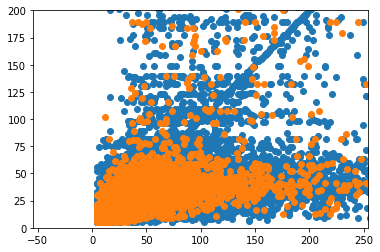

In [6]:
plt.scatter(y_train,y_pred_train)
plt.scatter(y_test,y_pred)
plt.axis('equal')
plt.xlim(0,200)
plt.ylim(0,200)